In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as rcf
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier as lgb
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
from catboost import CatBoostClassifier, Pool

pd.set_option('float_format', '{:f}'.format)  #showing full number

C:\Users\Deepak Mittal\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [8]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [9]:
print('In train data there are: {} categorical features;\n\t\t\t {} numerical features'.format(train.select_dtypes(include = ['object']).columns.size,
                                                                                   train.drop('Is_Lead', axis = 1).select_dtypes(exclude = ['object']).columns.size))

print('In test data there are: {} categorical features;\n\t\t\t {} numerical features.'.format(test.select_dtypes(include = ['object']).columns.size,
                                                                                   test.select_dtypes(exclude = ['object']).columns.size))

In train data there are: 6 categorical features;
			 3 numerical features
In test data there are: 6 categorical features;
			 3 numerical features.


In [10]:
#concatenating the train and test set

X = pd.concat([train.drop("Is_Lead", axis=1),test], axis=0).reset_index(drop=True)
y = train['Is_Lead'].reset_index(drop=True)

In [11]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               351037 non-null  object
 1   Age                  351037 non-null  int64 
 2   Region_Code          351037 non-null  object
 3   Occupation           351037 non-null  object
 4   Channel_Code         351037 non-null  object
 5   Vintage              351037 non-null  int64 
 6   Credit_Product       309190 non-null  object
 7   Avg_Account_Balance  351037 non-null  int64 
 8   Is_Active            351037 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.1+ MB


In [13]:
num = X.select_dtypes(exclude=['object']).copy()
num.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

In [14]:
cat = X.select_dtypes(include = ['object']).copy()
cat.columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

# Exploratory Data analysis

C:\Users\Deepak Mittal\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak Mittal\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Deepak Mittal\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

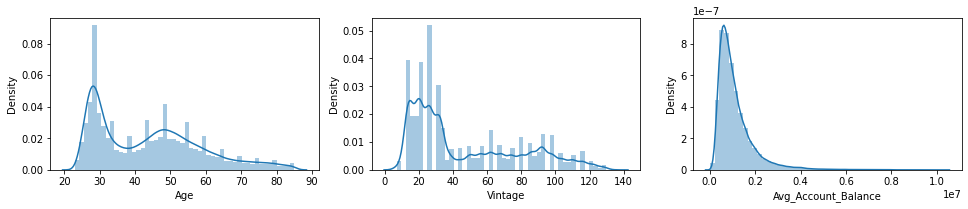

In [15]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(num.columns):
    plt.subplot(6,4,index+1)
    sns.distplot(num.loc[:,col].dropna(), kde=True)
fig.tight_layout(pad=1.0)

As we can see, Avg account Balance is right skewed 

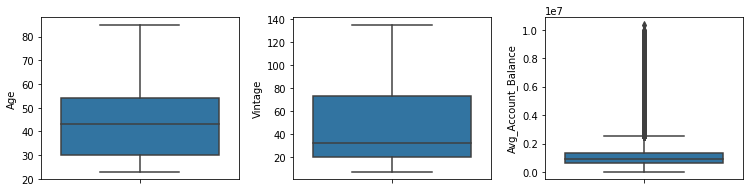

In [16]:
# Box Plot

fig = plt.figure(figsize=(14,15))
for index,col in enumerate(num):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=num.dropna())
fig.tight_layout(pad=1.0)

Avg Account balance is having outliers and we have to remove that outlier

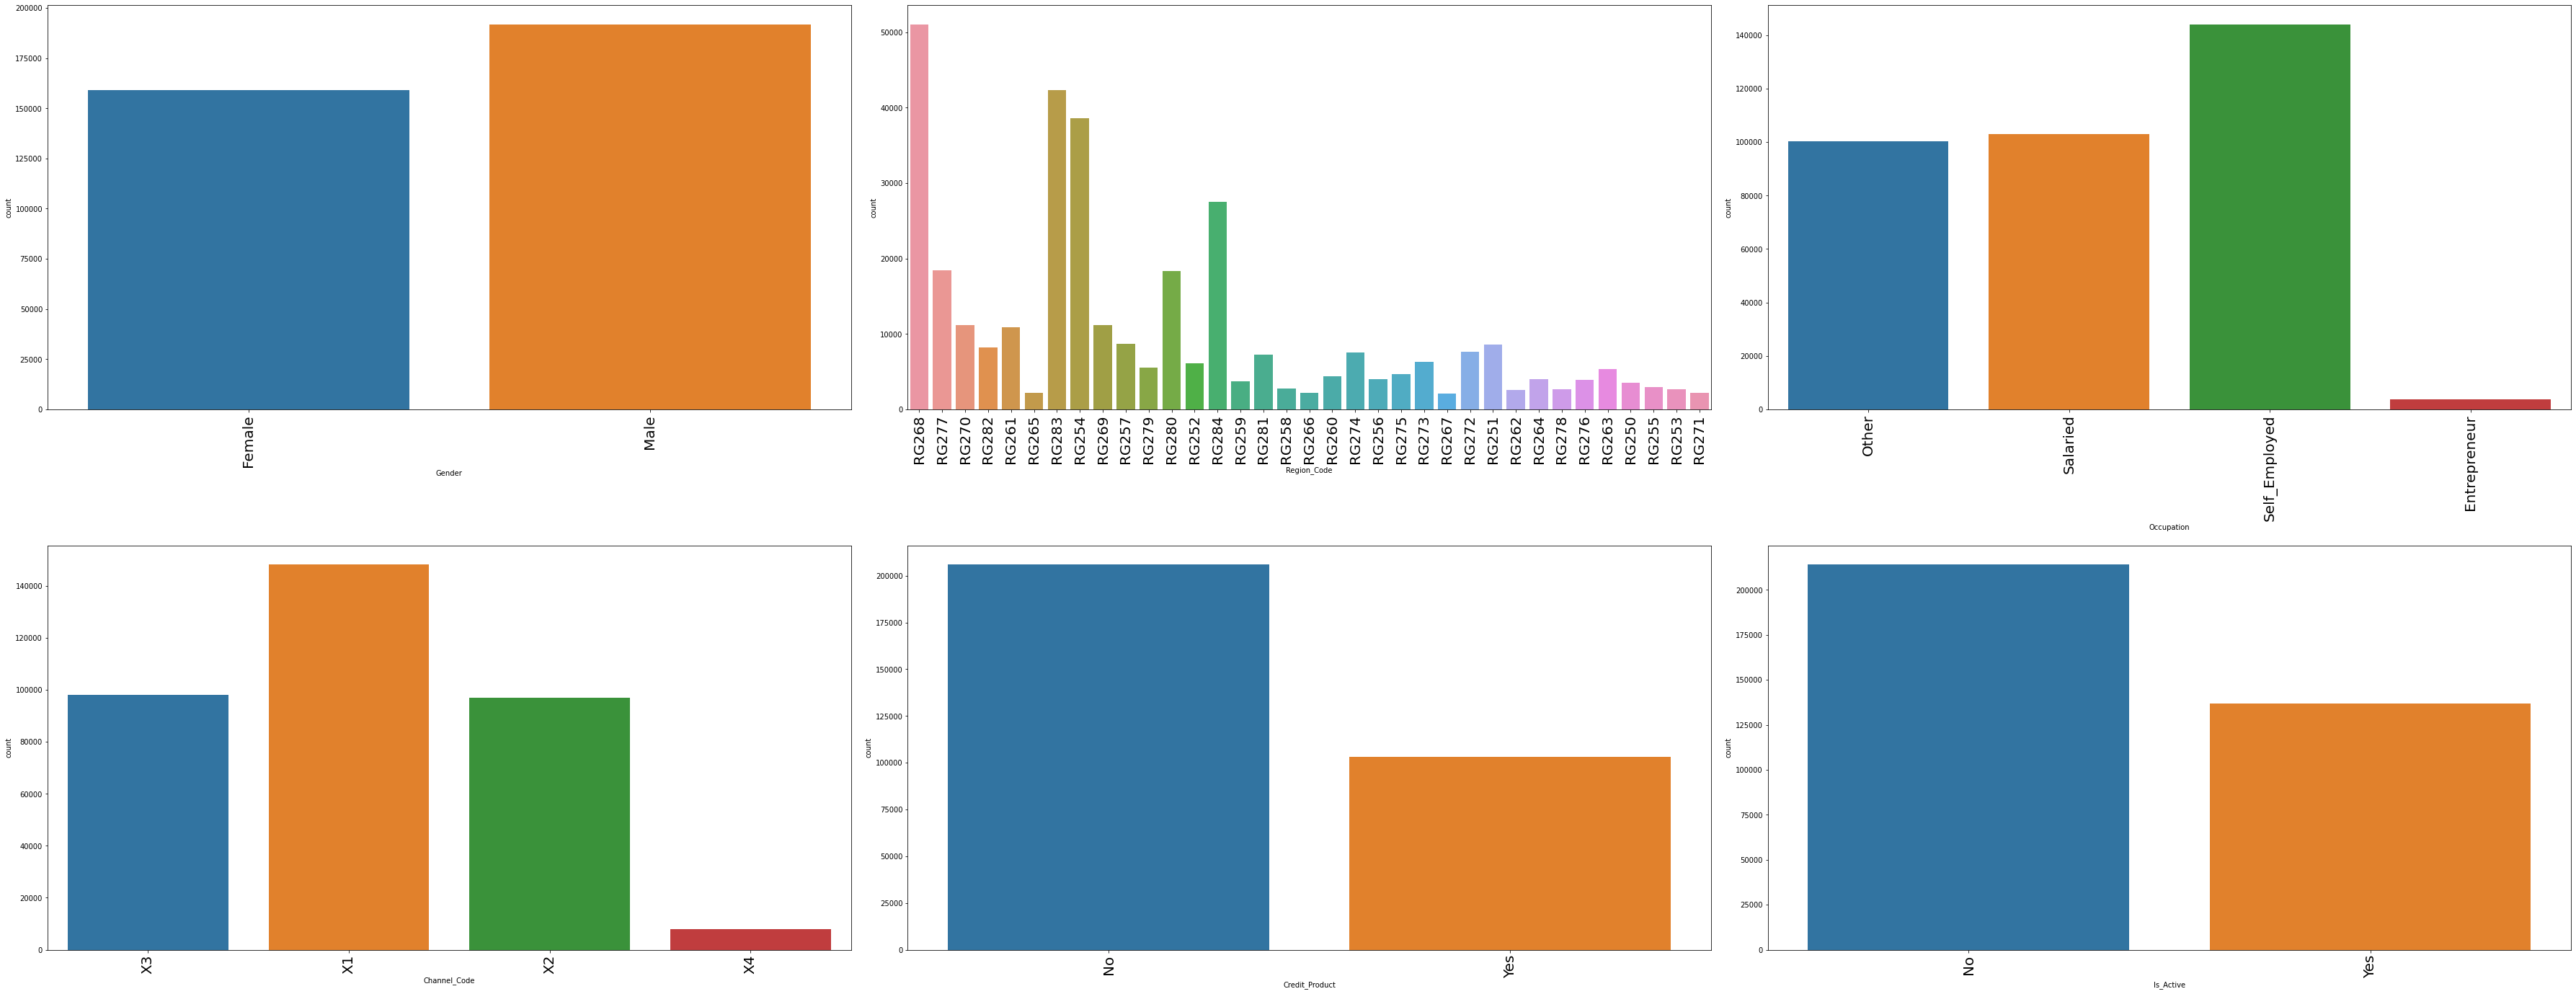

In [17]:
# Categorical Column

fig = plt.figure(figsize=(50,50))
for index in range(len(cat.columns)):
    plt.subplot(5,3,index+1)
    sns.countplot(x=cat.iloc[:,index], data=cat.dropna())
    plt.xticks(fontsize=20, rotation=90)
fig.tight_layout(pad=2.0)

#### Target Variable

C:\Users\Deepak Mittal\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


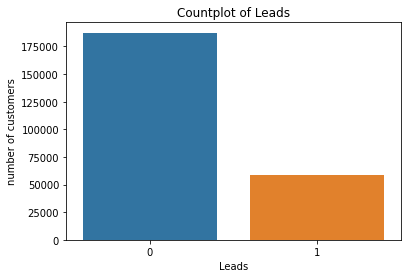

In [18]:
#2. distribution of target variable.
sns.countplot(y)

# Add labels
plt.title('Countplot of Leads')
plt.xlabel('Leads')
plt.ylabel('number of customers')
plt.show()

<AxesSubplot:>

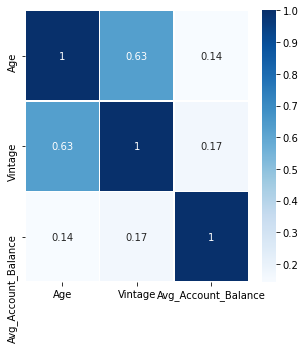

In [19]:
#From the correlation matrix we have identified the variables which are highly correlated with each other.

plt.figure(figsize=(5,5))
correlation = num.corr()
sns.heatmap(correlation, linewidth=0.5, annot= True, cmap='Blues')

#### Identifying relationship between Numerical Predictor and Target

In [20]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['Is_Lead']].sort_values(['Is_Lead'], ascending=False)

,Is_Lead
Is_Lead,1.000000
Vintage,0.279642
Age,0.230814
Avg_Account_Balance,0.053370


### Dealing with missing/null values

In [21]:
X.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         41847
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [22]:
X['Credit_Product'].fillna('NA', inplace=True)
X.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

### Addressing outliers

In [23]:
X.Avg_Account_Balance.describe()

count     351037.000000
mean     1130140.574991
std       856952.950112
min        20790.000000
25%       604185.000000
50%       895162.000000
75%      1368152.000000
max     10352009.000000
Name: Avg_Account_Balance, dtype: float64

In [24]:
Q1= X.Avg_Account_Balance.describe()['25%']
Q2 = X.Avg_Account_Balance.describe()['50%']
Q3 = X.Avg_Account_Balance.describe()['75%']

IQR= Q3-Q1
IQR

763967.0

In [25]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -541765.5
up_limit is 2514102.5


There won't be any negative limit as it is Average balance. so there is only upper limit and we will drop the rows which has Average balance more than the given limit to remove the outliers.

In [26]:
train = train.drop(train[train['Avg_Account_Balance'] > up_lim].index)

C:\Users\Deepak Mittal\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Avg_Account_Balance'>

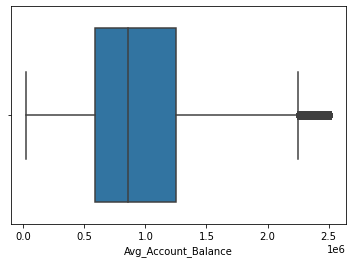

In [27]:
sns.boxplot(train.Avg_Account_Balance)

In [28]:
# we will take the sqrt of Avg account balance to remove the skewness

X['Avg_Account_Balance']=np.sqrt(X['Avg_Account_Balance'])

C:\Users\Deepak Mittal\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

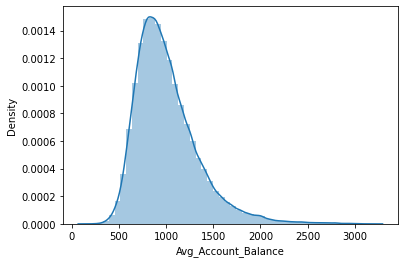

In [29]:
sns.distplot(X['Avg_Account_Balance'].dropna(), kde=True)

This is getting a bit better than the previous data

In [30]:
cat_columns = []
for col in cat.columns:
    print(col) 
    cat_columns.append(col)
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active


In [31]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,1,1022.592783,0
1,0,30,27,2,0,32,1,762.881380,0
2,0,56,18,3,2,26,1,1218.324669,1
3,1,34,20,2,0,19,1,685.896494,0
4,0,30,32,2,0,33,1,941.693687,0


### Modeling

In [32]:
x = X.loc[train.index]
y = y.loc[train.index]
test = X.loc[test.index]

#### VIF(Variance inflation factor)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns
 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,Gender,2.251178
1,Age,15.694807
2,Region_Code,4.253817
3,Occupation,5.733876
4,Channel_Code,3.369045
5,Vintage,5.486752
6,Credit_Product,4.327306
7,Avg_Account_Balance,11.647563
8,Is_Active,1.789747


In [34]:
SEED = 1972
cat_features_index = [i for i,col in enumerate(X.columns) if col in cat_columns]
cat_features_index

[0, 2, 3, 4, 6, 8]

In [35]:
params = {
    'cat_features' : cat_features_index,
    'metric': 'auc',
    'seed': SEED}

In [36]:
clf = lgb(**params)
clf.fit(x,y,verbose=-1)
cross_val_score(clf,x,y, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[LightGBM] [Warning] Unknown parameter: cat_features


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.6s finished


0.8739869792153059

### Logistics

In [41]:
logreg = LogisticRegression()
log=logreg.fit(x,y)

C:\Users\Deepak Mittal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
cross_val_score(log,x,y, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished


0.7038731998651826

### Random Forest

In [43]:
model = rcf(criterion = 'entropy', random_state = SEED)
model.fit(x,y)
cross_val_score(model,x,y, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


0.8559913299142405

### CatBoost

In [44]:
params = {
    'cat_features': cat_features_index,
    'eval_metric': 'AUC',
    'random_seed': SEED,}

In [46]:
bst = CatBoostClassifier(**params)
catb=bst.fit(x,y, plot=True, verbose=False)
cross_val_score(catb,x,y, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').mean()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 32.7min finished


0.873876897756334

In [64]:
test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,1,1022.592783,0
1,0,30,27,2,0,32,1,762.881380,0
2,0,56,18,3,2,26,1,1218.324669,1
3,1,34,20,2,0,19,1,685.896494,0
4,0,30,32,2,0,33,1,941.693687,0
...,...,...,...,...,...,...,...,...,...
105307,1,45,33,3,2,91,1,1784.257268,1
105308,0,72,11,1,2,87,1,1194.283886,0
105309,0,67,29,1,0,27,1,1329.578881,1
105310,0,27,25,2,0,21,2,741.188910,0


In [66]:
len(test.columns)

9

In [39]:
import pickle
with open('Credit_card_lead_prediction.pickle','wb') as f:
    pickle.dump(clf,f)

In [79]:
x=np.zeros(9)
x[0]=0
x[1]=73
x[2]=18
x[3]=1
x[4]=2
x[5]=43
x[6]=1
x[7]=1022.592783
x[8]=0

#clf.predict([d])
#[0,73,18,1,2,43,1,1022.592783,0]

numpy.float64